In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def loud_housing_data():
    return pd.read_csv('datasets/housing/housing.csv')

In [4]:
housing = loud_housing_data()

In [5]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

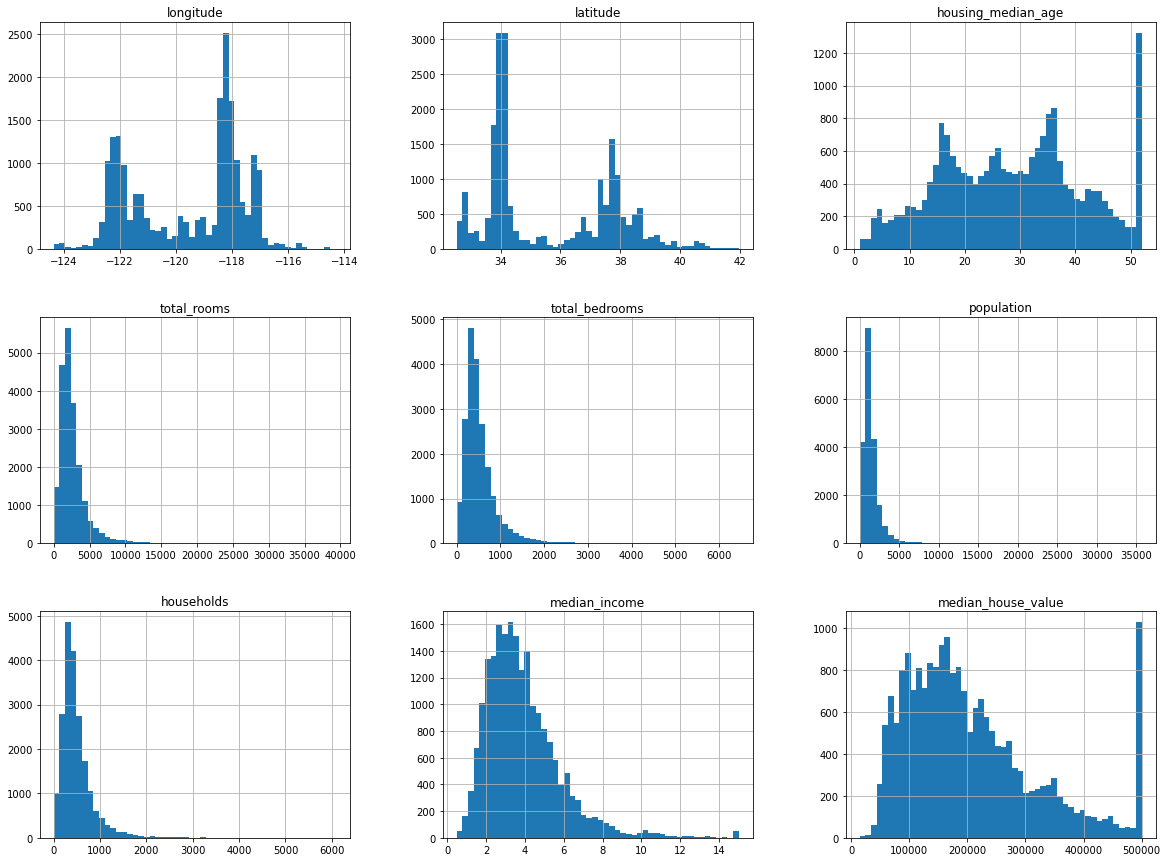

In [9]:
housing.hist(bins=50, figsize=(20, 15))

In [10]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
from zlib import crc32

In [15]:
help(crc32)

Help on built-in function crc32 in module zlib:

crc32(data, value=0, /)
    Compute a CRC-32 checksum of data.
    
      value
        Starting value of the checksum.
    
    The returned checksum is an integer.



In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()

In [19]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [21]:
len(train_set)

16512

In [22]:
len(test_set)

4128

In [23]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

In [24]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [25]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

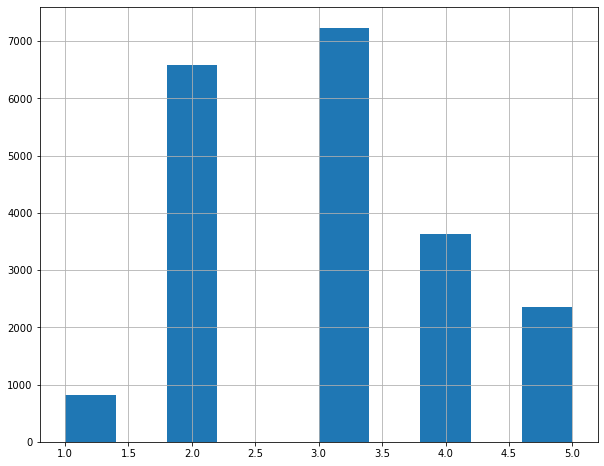

In [29]:
housing['income_cat'].hist(figsize=(10,8))

In [30]:
# help(pd.cut)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [33]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Exploring Data

In [35]:
housing = strat_train_set.copy()

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

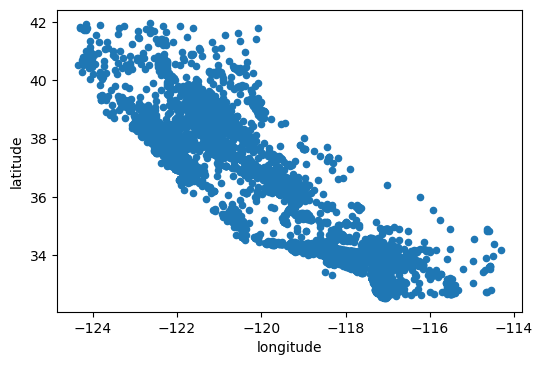

In [37]:
fig = plt.figure(dpi=100)
housing.plot(kind='scatter', x='longitude', y='latitude', ax=fig.gca()) # gca = get current axes

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

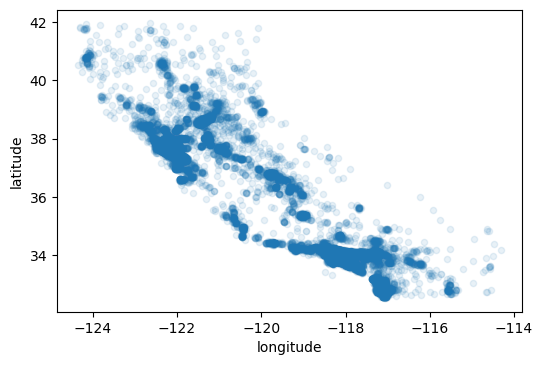

In [38]:
fig = plt.figure(dpi=100)
housing.plot(kind='scatter', x='longitude', y='latitude', ax=fig.gca(), alpha=0.1) # gca = get current axes

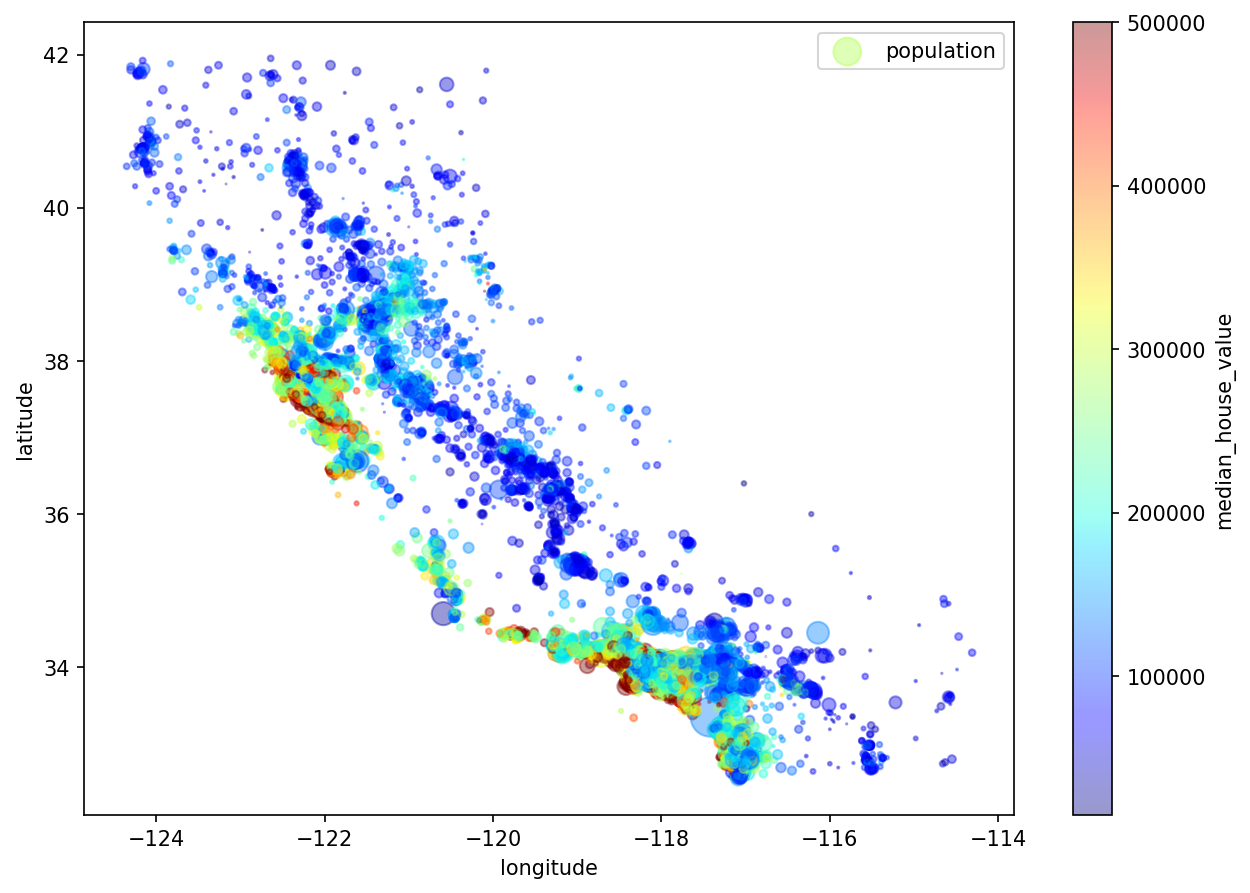

In [39]:
fig = plt.figure(dpi=150)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, ax=fig.gca(),
            s=housing['population'] / 100,
            label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [40]:
corr_matrix = housing.corr()

In [41]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [42]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [43]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

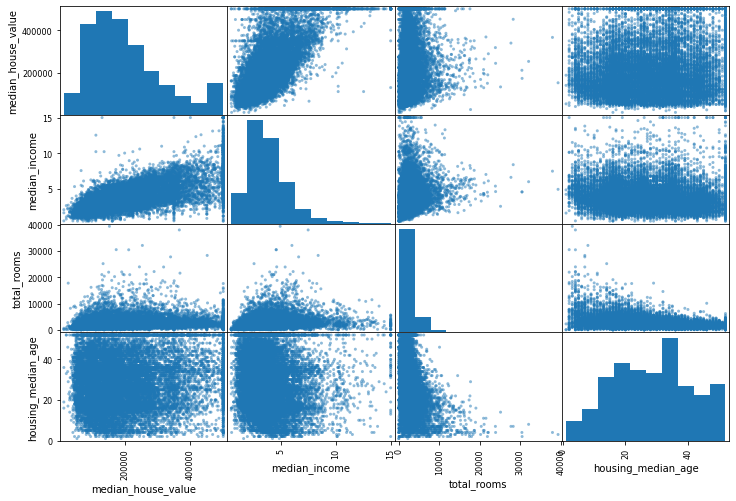

In [44]:
attributes = ["median_house_value", "median_income", "total_rooms",
    "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

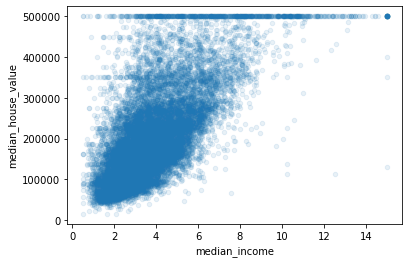

In [45]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [46]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [47]:
corr_matrix = housing.corr()

In [48]:
corr_matrix['median_house_value']

longitude                  -0.047432
latitude                   -0.142724
housing_median_age          0.114110
total_rooms                 0.135097
total_bedrooms              0.047689
population                 -0.026920
households                  0.064506
median_income               0.687160
median_house_value          1.000000
rooms_per_household         0.146285
bedrooms_per_room          -0.259984
population_per_household   -0.021985
Name: median_house_value, dtype: float64

In [49]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning

In [50]:
# housing.dropna(subset=['total_bedrooms'])   # 1
# housing.drop('total_bedrooms', axis=1)      # 2

# median = housing['total_bedrooms'].median() # 3
# housing['total_bedrooms'].fillna(median, inplace=True)

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(strategy='median')

In [53]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [54]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [55]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [56]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [57]:
X = imputer.transform(housing_num)

In [58]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Handling Text and Categorical Attributes


In [59]:
housing_cat = housing[['ocean_proximity']]

In [60]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
ordinal_encoder = OrdinalEncoder()

In [63]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [64]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [65]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
cat_encoder = OneHotEncoder()

In [68]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [69]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [70]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [71]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers


In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [73]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [76]:
from sklearn.compose import ColumnTransformer

In [77]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model
 

## Training and Evaluating on the Training Set


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [80]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print('predictions:')
print(lin_reg.predict(some_data_prepared))

print('\nlabels:')
print(some_labels)

predictions:
[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]

labels:
17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
lin_rmse

68628.19819848922

model underfitting

Let's try a powerful model:

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [85]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [88]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [89]:
display_scores(tree_rmse_scores)

Scores: [70264.52858073 65290.69793414 69910.4092104  69265.09684615
 70885.32001069 74382.73331269 69860.801696   72644.16001757
 77403.82217007 69367.64875766]
Mean: 70927.52185361051
Standard deviation: 3105.031313544548


In [90]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_rg = RandomForestRegressor()

In [93]:
forest_rg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [94]:
scores = cross_val_score(forest_rg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49522.3925903  47859.13680075 49635.0806796  52205.74542467
 49767.68465492 53195.55128481 48746.51769354 47945.5650429
 52951.74132791 50211.1977964 ]
Mean: 50204.06132957964
Standard deviation: 1849.5484177844503


# Fine-Tune Your Model

## Grid Search

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [101]:
cvres = grid_search.cv_results_

In [102]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65107.44601750737 {'max_features': 2, 'n_estimators': 3}
55274.423686715934 {'max_features': 2, 'n_estimators': 10}
52849.008613932696 {'max_features': 2, 'n_estimators': 30}
60440.1277192717 {'max_features': 4, 'n_estimators': 3}
53258.182193091154 {'max_features': 4, 'n_estimators': 10}
50532.74117295276 {'max_features': 4, 'n_estimators': 30}
59484.317689796364 {'max_features': 6, 'n_estimators': 3}
52417.42272342732 {'max_features': 6, 'n_estimators': 10}
50200.058614856556 {'max_features': 6, 'n_estimators': 30}
58160.2781783148 {'max_features': 8, 'n_estimators': 3}
52091.41187505883 {'max_features': 8, 'n_estimators': 10}
50082.59213079387 {'max_features': 8, 'n_estimators': 30}
62783.8961410415 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54215.82078858794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60175.18586507791 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52488.00275078705 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [104]:
feature_importances

array([6.88987839e-02, 6.02938625e-02, 4.10582814e-02, 1.59264252e-02,
       1.52277746e-02, 1.55379555e-02, 1.38735416e-02, 3.85012392e-01,
       4.33486044e-02, 1.09434860e-01, 5.45061894e-02, 5.84516519e-03,
       1.65854558e-01, 8.64800164e-05, 1.90580172e-03, 3.18932454e-03])

In [105]:
extra_attribs = ['rooms_per_hold', 'pop_per_hold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38501239203084425, 'median_income'),
 (0.16585455771056143, 'INLAND'),
 (0.10943486025153212, 'pop_per_hold'),
 (0.06889878385572225, 'longitude'),
 (0.06029386246853476, 'latitude'),
 (0.05450618941857569, 'bedrooms_per_room'),
 (0.043348604434688943, 'rooms_per_hold'),
 (0.041058281438478415, 'housing_median_age'),
 (0.01592642519334073, 'total_rooms'),
 (0.015537955512021657, 'population'),
 (0.015227774583212521, 'total_bedrooms'),
 (0.01387354163279017, 'households'),
 (0.005845165186629962, '<1H OCEAN'),
 (0.0031893245446896214, 'NEAR OCEAN'),
 (0.0019058017220026958, 'NEAR BAY'),
 (8.648001637483168e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [106]:
final_model = grid_search.best_estimator_

In [109]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:
final_rmse

47870.65703295155

In [111]:
from scipy import stats

In [112]:
confidence = 0.95

In [113]:
squared_erros = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_erros) - 1,
                        loc=squared_erros.mean(),
                        scale=stats.sem(squared_erros)))

array([45867.99448546, 49792.83775218])